![](itd.png)

    
# Análisis de Datos Masivos
## Regresión lineal simple en Python

## Nombre del docente
### José Gabriel Rodriguez Rivas
## Nombre del alumno
### Calos Alberto Carrete Gómez

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
# Se importa el archivo stores-dist.csv
salesDist = pd.read_csv('stores-dist.csv')

# Se verifica el archivo importado
salesDist.head()

,district,annual net sales,number of stores in district
0,1,231.0,12
1,2,156.0,13
2,3,10.0,16
3,4,519.0,2
4,5,437.0,6


In [3]:
salesDist = salesDist.rename(columns={'annual net sales':'sales','number of stores in district':'stores'})
salesDist.columns = ['district','sales','stores']
salesDist.head()



,district,sales,stores
0,1,231.0,12
1,2,156.0,13
2,3,10.0,16
3,4,519.0,2
4,5,437.0,6


In [4]:
salesDist.corr() #Se verifica la correlación

,district,sales,stores
district,1.000000,0.136103,-0.230617
sales,0.136103,1.000000,-0.912236
stores,-0.230617,-0.912236,1.000000


In [5]:
sales = salesDist.drop(['district'],axis=1)
sales.head()

,sales,stores
0,231.0,12
1,156.0,13
2,10.0,16
3,519.0,2
4,437.0,6


**Pregunta: De los datos del coeficiente de correlación, ¿qué tipo de asignación observó entre las ventas netas anuales y la cantidad de tiendas en el distrito?**

**Respuesta**: La correlación entre Stores y Sales es una correlación alta negativa con -0.91 casi llegando a -1, mientras que la correlación de stores con district es bastante baja, pues llega a -0.23 lo cual la situa muy lejana a -1


### Paso 2. Crear un Gráfico

In [6]:
# Dependiente de la variable y en axis
y = sales['sales']
# Dependiente de la variable x en axis
x = sales.stores

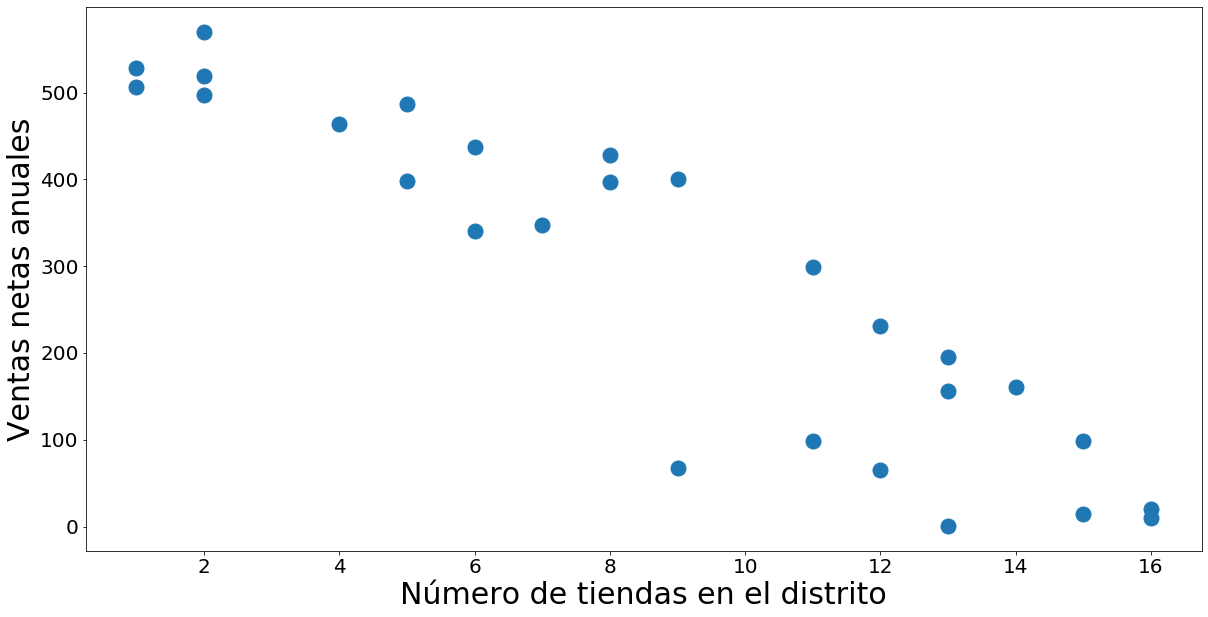

In [7]:
%matplotlib inline

# Incremente el tamaño
plt.figure(figsize=(20,10))
# Crear un diagrama de dispersión: número de tiendas en el distrito vs. ventas netas anuales
plt.plot(x,y, 'o', markersize = 15)
# Agregue etiquetas de eje y aumente el tamaño de fuente
plt.ylabel('Ventas netas anuales', fontsize = 30)
plt.xlabel('Número de tiendas en el distrito', fontsize = 30)
# Aumente el tamaño de fuente en los ticks en los ejes xey
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
#Muestra la gráfica
plt.show()

### Parte 3: Realizar una regresión lineal simple


#### Paso 1: Calcular la pendiente y la intercepción Y de la línea de regresión lineal


In [8]:
# Usa polyfit numpy para regresión lineal para ajustar los datos
# Genera la pendiente de la línea (m)
# Genera la intersección en y (b)
m, b = np.polyfit(x,y,1) 
print ('La pendiente de la línea es {:.2f}.'.format(m))
print ('La intersección en y es {:.2f}.'.format(b))
print ('La línea de regresión lineal simple que mejor se ajusta es {:.2f}x + {:.2f}.'.format(m,b))

La pendiente de la línea es -35.79.
La intersección en y es 599.38.
La línea de regresión lineal simple que mejor se ajusta es -35.79x + 599.38.


#### Paso 2: Calcular el centroide


In [9]:
# cordenada y del centroide
y_mean = y.mean()    
# cordenada x del centroide
x_mean = x.mean()
print ('El centroide para este conjunto de datos es x = {:.2f} y en y = {:.2f}.'.format(x_mean, y_mean))


El centroide para este conjunto de datos es x = 8.74 y en y = 286.57.


#### Paso 3: Superponer la línea de regresión y el punto del centroide en el gráfico


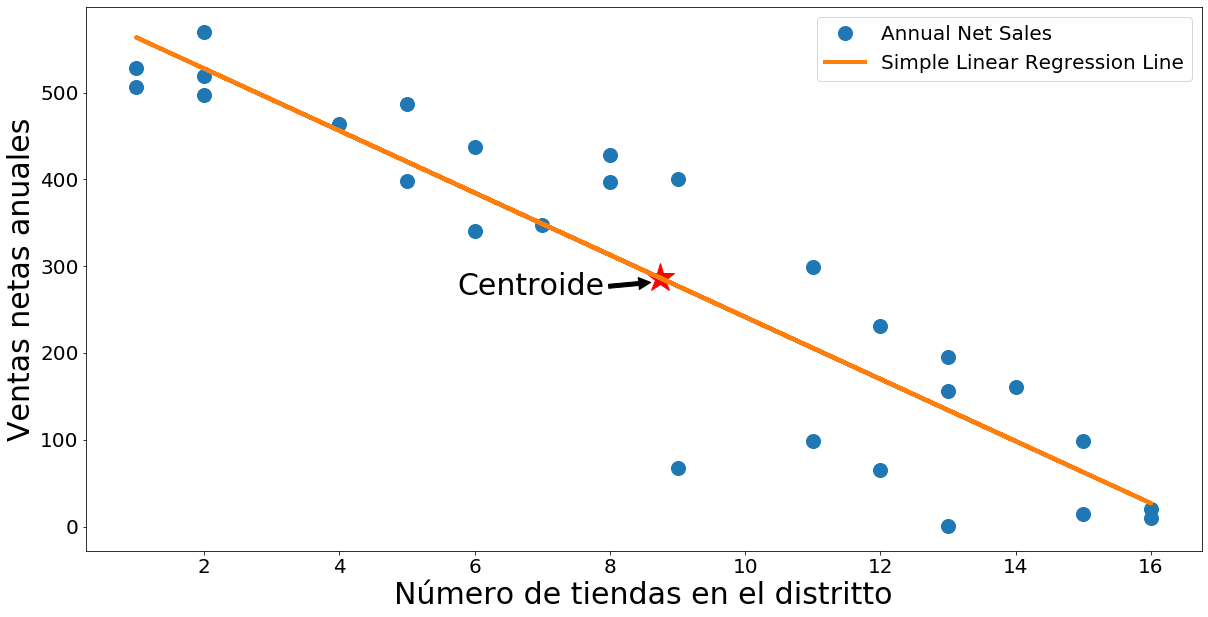

In [10]:
%matplotlib inline
# Amplia el tamaño de la trama
plt.figure(figsize=(20,10))
# Traza el diagrama de dispersión del conjunto de datos
plt.plot(x,y, 'o', markersize = 14, label = "Annual Net Sales") 
# Grafica el punto centroide
plt.plot(x_mean,y_mean, '*', markersize = 30, color = "r") 
# Traza la línea de regresión lineal
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 4)
# Crea las etiquetas de los ejes xey
plt.ylabel('Ventas netas anuales', fontsize = 30)
plt.xlabel('Número de tiendas en el distritto', fontsize = 30)
# Amplia las marcas de verificación x e y
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
# Señala el punto centroide en la gráfica
plt.annotate('Centroide', xy=(x_mean-0.1, y_mean-5), xytext=(x_mean-3, y_mean-20), arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 30)
#Crea una leyenda
plt.legend(loc = 'upper right', fontsize = 20)

#### Paso 4: Predicción


In [11]:
# Función para predecir las ventas netas desde la línea de regresión
def predict(query):
    if query >= 1:
        predict = m * query + b
        return predict
    else:
        print ("You must have at least 1 store in the district to predict the annual net sales.")

In [12]:
predict(4)

456.2313681207654

**Pregunta: ¿Cuál es la venta neta previsible si hay 4 tiendas en el distrito?**
    
**Respuesta**: Sería un aproximado de 456.231
